## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Michael\Desktop\Career Foundry\02 Data Immersion Course\06 Advanced Analytics and Dashboard Design'

In [4]:
df = pd.read_csv(os.path.join(path, '00 Data', 'World Bank Cleaned', 'eco_edu_pov.csv'))

In [5]:
df.shape

(4758, 28)

In [6]:
df.head()

,Unnamed: 0,Country Name,Year,GDP per capita (constant 2015 US$),GDP per capita growth (annual %),GNI per capita (constant 2015 US$),GNI per capita growth (annual %),Adolescents out of school (% of lower secondary school age),"Adolescents out of school, female (% of female lower secondary school age)","Adolescents out of school, male (% of male lower secondary school age)",...,"School enrollment, primary, female (% net)","School enrollment, primary, male (% net)","School enrollment, secondary (% net)","School enrollment, secondary, female (% net)","School enrollment, secondary, male (% net)",Gini index,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population),Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population)
0,0,Afghanistan,1996,359.766116,0.927029,597.832321,NaN,NaN,NaN,NaN,...,NaN,NaN,26.55995,14.40342,37.98502,NaN,NaN,NaN,NaN,33.7
1,1,Afghanistan,1997,359.766116,0.927029,597.832321,NaN,NaN,NaN,NaN,...,NaN,NaN,26.55995,14.40342,37.98502,NaN,NaN,NaN,NaN,33.7
2,2,Afghanistan,1998,359.766116,0.927029,597.832321,NaN,NaN,NaN,NaN,...,NaN,NaN,26.55995,14.40342,37.98502,NaN,NaN,NaN,NaN,33.7
3,3,Afghanistan,1999,359.766116,0.927029,597.832321,NaN,NaN,NaN,NaN,...,NaN,NaN,26.55995,14.40342,37.98502,NaN,NaN,NaN,NaN,33.7
4,4,Afghanistan,2000,359.766116,0.927029,597.832321,NaN,NaN,NaN,NaN,...,NaN,NaN,26.55995,14.40342,37.98502,NaN,NaN,NaN,NaN,33.7


In [7]:
list(df)

['Unnamed: 0',
 'Country Name',
 'Year',
 'GDP per capita (constant 2015 US$)',
 'GDP per capita growth (annual %)',
 'GNI per capita (constant 2015 US$)',
 'GNI per capita growth (annual %)',
 'Adolescents out of school (% of lower secondary school age)',
 'Adolescents out of school, female (% of female lower secondary school age)',
 'Adolescents out of school, male (% of male lower secondary school age)',
 'Children out of school (% of primary school age)',
 'Children out of school, female (% of female primary school age)',
 'Children out of school, male (% of male primary school age)',
 'Government expenditure on education, total (% of GDP)',
 'Primary completion rate, female (% of relevant age group)',
 'Primary completion rate, male (% of relevant age group)',
 'Primary completion rate, total (% of relevant age group)',
 'School enrollment, primary (% net)',
 'School enrollment, primary, female (% net)',
 'School enrollment, primary, male (% net)',
 'School enrollment, secondary (

In [8]:
subframe = df[[
            'Year',
            'School enrollment, primary (% net)',
            'School enrollment, secondary (% net)',
            'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'
            ]]

In [9]:
subframe.rename(columns = {'School enrollment, primary (% net)' : 'Primary enrolment',
                           'School enrollment, secondary (% net)': 'Secondary Enrolment',
                           'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)': 'Poverty rate',
                           }, inplace = True)

C:\Users\Michael\AppData\Local\Temp\ipykernel_6004\316315924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe.rename(columns = {'School enrollment, primary (% net)' : 'Primary enrolment',


In [10]:
subframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4758 non-null   int64  
 1   Primary enrolment    4628 non-null   float64
 2   Secondary Enrolment  4342 non-null   float64
 3   Poverty rate         4654 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 148.8 KB


In [11]:
subframe = subframe.dropna()

In [12]:
subframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4264 entries, 26 to 4757
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4264 non-null   int64  
 1   Primary enrolment    4264 non-null   float64
 2   Secondary Enrolment  4264 non-null   float64
 3   Poverty rate         4264 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 166.6 KB


### 2. The elbow technique

Other that 'Year' the three variables are percentages, and therefore comparable values.

In order to normalise the data, 1996 will become Year 0, and all others will represent the nu ber of years after 1996. This will mean that all data variables are of the same order.

In [13]:
subframe['Year'] = subframe['Year'].sub(1996)
subframe.head(5)

,Year,Primary enrolment,Secondary Enrolment,Poverty rate
26,0,96.79354,66.69051,0.5
27,1,96.79354,66.69051,0.6
28,2,96.79354,66.69051,0.7
29,3,96.79354,66.69051,0.8
30,4,95.38335,66.69051,0.9


In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(subframe).score(subframe) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-5842667.415670094,
 -2286592.8608785872,
 -1602977.4009532295,
 -1336429.330838406,
 -1110792.989334289,
 -981736.9143835136,
 -885454.3263298632,
 -809852.9943087411,
 -742193.9308780723]

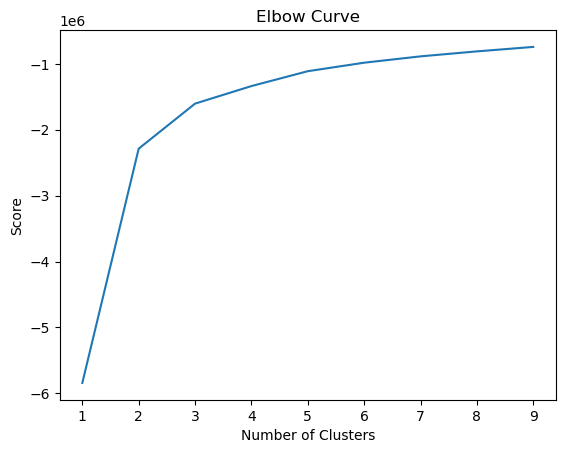

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

##### There is sufficient evidence that only two clusters might be required, but the gradient from 2 to 3 is such that 3 clusters is likely optimal.

### 3. k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [18]:
# Fit the k-means object to the data.

kmeans.fit(subframe)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [19]:
subframe['clusters'] = kmeans.fit_predict(subframe)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
subframe.head()

,Year,Primary enrolment,Secondary Enrolment,Poverty rate,clusters
26,0,96.79354,66.69051,0.5,0
27,1,96.79354,66.69051,0.6,0
28,2,96.79354,66.69051,0.7,0
29,3,96.79354,66.69051,0.8,0
30,4,95.38335,66.69051,0.9,0


In [21]:
subframe['clusters'].value_counts()

clusters
0    2255
2    1160
1     849
Name: count, dtype: int64

##### Add the country names back into the subframe for reference

In [22]:
subframe = pd.merge(subframe, df['Country Name'], left_index=True, right_index=True)
subframe.head(100)

,Year,Primary enrolment,Secondary Enrolment,Poverty rate,clusters,Country Name
26,0,96.79354,66.69051,0.50,0,Albania
27,1,96.79354,66.69051,0.60,0,Albania
28,2,96.79354,66.69051,0.70,0,Albania
29,3,96.79354,66.69051,0.80,0,Albania
30,4,95.38335,66.69051,0.90,0,Albania
...,...,...,...,...,...,...
121,17,99.11341,87.09754,0.60,0,Argentina
122,18,99.44461,87.63250,0.60,0,Argentina
123,19,99.49576,88.44048,0.65,0,Argentina
124,20,99.10172,89.88468,0.70,0,Argentina


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


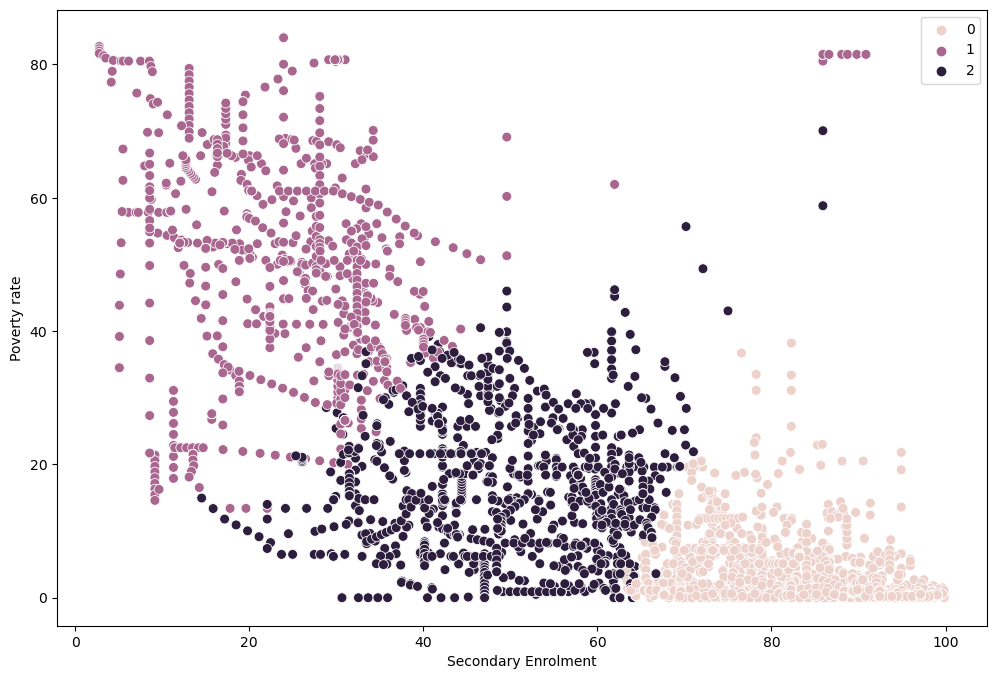

In [23]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subframe['Secondary Enrolment'], y=subframe['Poverty rate'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Secondary Enrolment') # Label x-axis.
plt.ylabel('Poverty rate') # Label y-axis.
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


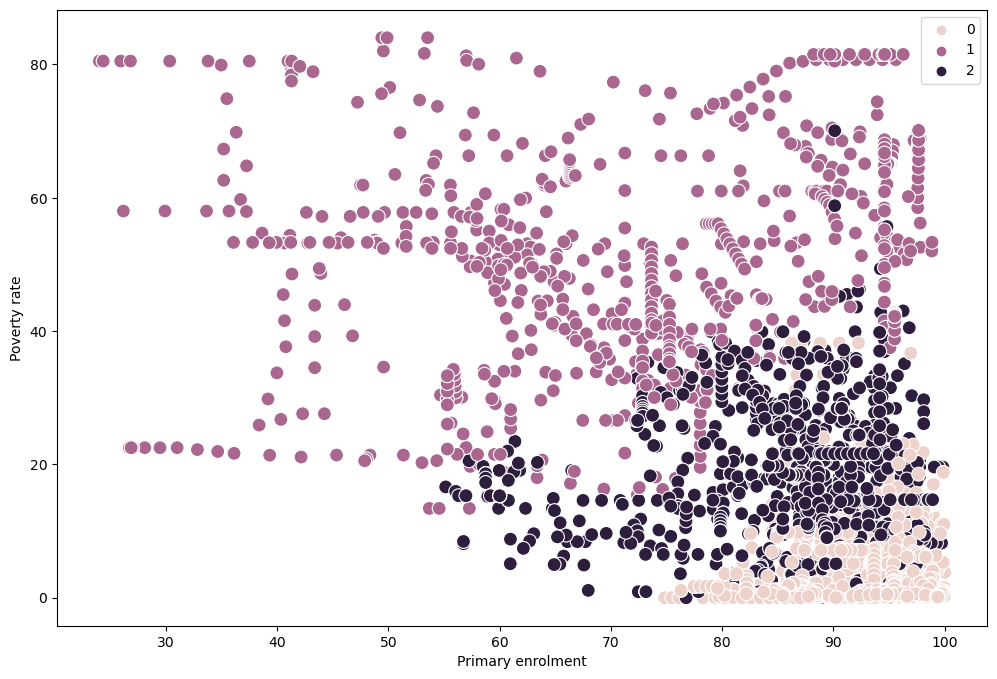

In [24]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subframe['Primary enrolment'], y=subframe['Poverty rate'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Primary enrolment') 
plt.ylabel('Poverty rate') 
plt.show()

In [25]:
subframe.loc[subframe['clusters'] == 2, 'cluster'] = 'Group 2'
subframe.loc[subframe['clusters'] == 1, 'cluster'] = 'Group 3'
subframe.loc[subframe['clusters'] == 0, 'cluster'] = 'Group 1'

C:\Users\Michael\AppData\Local\Temp\ipykernel_6004\4109407953.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Group 2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  subframe.loc[subframe['clusters'] == 2, 'cluster'] = 'Group 2'


In [26]:
subframe.groupby('cluster').agg({'Year':['mean', 'median'], 
                         'Primary enrolment':['mean', 'median'], 
                         'Secondary Enrolment':['mean', 'median'],
                          'Poverty rate':['mean', 'median']})

Year        Primary enrolment            Secondary Enrolment  \
              mean median              mean     median                mean   
cluster                                                                      
Group 1  13.260754   14.0         93.920589  95.192380           84.300131   
Group 2  12.521552   12.0         86.574230  88.850855           49.109802   
Group 3  10.449941   10.0         69.970987  72.469640           25.075233   

                  Poverty rate         
           median         mean median  
cluster                                
Group 1  85.51776     2.701653   0.90  
Group 2  48.54661    16.405641  15.40  
Group 3  24.77815    50.552921  51.08

The averages calculated for school enrolment values are lowest for 'Group 1', and highest for 'Group 3'. The reverse is true for the Poverty rate averages.

It is also noatable that the 'Year' is greatest in 'Group 3'. This would indicate that the enrolment in school is increasing, and poverty is decreasing with time.

In [27]:
max(subframe['Year'])

25

In [28]:
## 3D graph for the two enrolment rates against poverty, with the years since 1996 as a filter range

from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('School Enrolment and Poverty by Years (since 1996)'),
    dcc.Graph(id="graph"),
    html.P("Years after 1996:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=25, step=1,
        marks={0: '0', 5: '5', 10: '10', 15: '15', 20: '20', 25: '25'},
        value=[5, 5]
    ),
])

@app.callback(
    Output("graph", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = subframe
    low, high = slider_range
    mask = (subframe.Year >= low) & (subframe.Year <= high)

    fig = px.scatter_3d(df[mask], 
        x='Secondary Enrolment', y='Primary enrolment', z='Poverty rate',
        color="cluster", opacity = 0.3, hover_data=['Country Name'])
    return fig

app.run_server(debug=True)

### Uses for Clusters

The clusters are useful, in that they alighn with the World Banks' categorising of High, Medium, and Low development in countries. Comparing The World Bank's designation against these clusters could go some way to highlighting how much of an indicator these factors are in predicting the level of development, as assigned by The World Bank.

The cluster group is also useful as weeing if countries are in different groups for different years will allow me to separate out mobile and non-mobile nation data. Giving a focusw group on how nations ahve moved from one designate group to another.